c:\Users\fikre\Change-Point-Analysis\src\data_loader.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])  # Let pandas infer the format


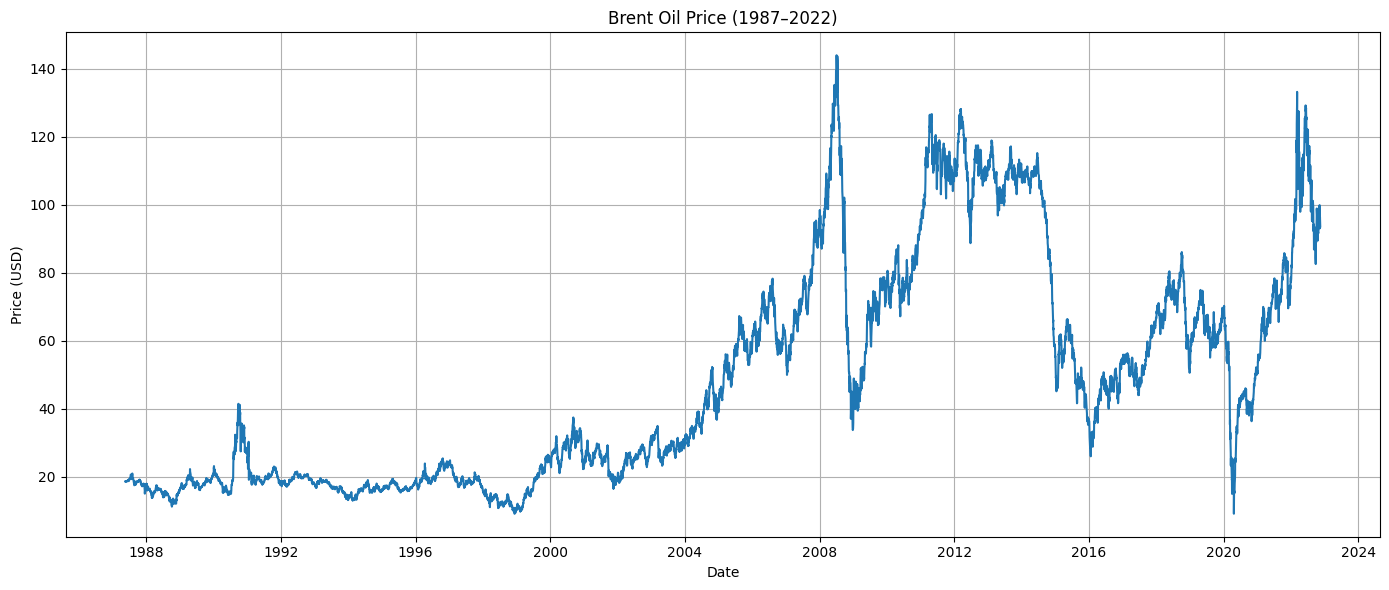

In [4]:
# 1. Import Libraries
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

from data_loader import load_oil_data

# 2. Load Data
df = load_oil_data("../data/BrentOilPrices.csv")
prices = df['Price'].values

# 3. Plot Original Series
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], prices, label="Brent Oil Price")
plt.title("Brent Oil Price (1987–2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


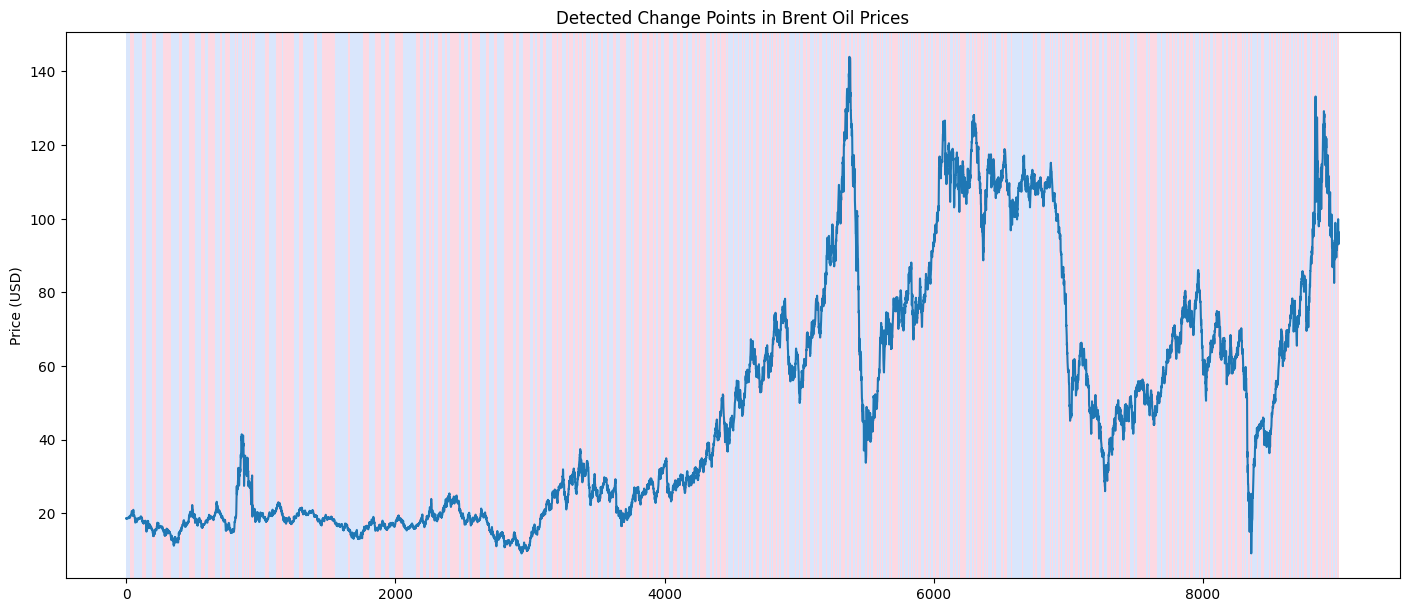

In [5]:
# 4. Change Point Detection - Mean Shift (Pelt + L2 cost)
model = "l2"  # cost function: least squares
algo = rpt.Pelt(model=model).fit(prices)
breaks = algo.predict(pen=10)  # increase penalty for fewer breakpoints

# 5. Plot Results
rpt.display(prices, breaks, figsize=(14, 6))
plt.title("Detected Change Points in Brent Oil Prices")
plt.ylabel("Price (USD)")
plt.show()


In [6]:
# 6. Print Change Dates
print("Detected change points at:")
for i in breaks:
    if i < len(df):
        print(f"- {df.iloc[i]['Date'].date()} at index {i}")


Detected change points at:
- 1987-07-02 at index 30
- 1987-08-13 at index 60
- 1987-11-05 at index 120
- 1987-12-10 at index 145
- 1988-02-17 at index 190
- 1988-04-08 at index 225
- 1988-06-10 at index 270
- 1988-09-02 at index 330
- 1988-11-25 at index 390
- 1989-01-03 at index 415
- 1989-03-14 at index 465
- 1989-05-19 at index 510
- 1989-07-21 at index 555
- 1989-09-01 at index 585
- 1989-09-29 at index 605
- 1989-12-15 at index 660
- 1990-02-07 at index 695
- 1990-03-07 at index 715
- 1990-04-04 at index 735
- 1990-05-25 at index 770
- 1990-07-16 at index 805
- 1990-07-30 at index 815
- 1990-08-06 at index 820
- 1990-08-20 at index 830
- 1990-08-27 at index 835
- 1990-09-03 at index 840
- 1990-09-17 at index 850
- 1990-09-24 at index 855
- 1990-10-01 at index 860
- 1990-10-08 at index 865
- 1990-10-15 at index 870
- 1990-10-22 at index 875
- 1990-10-29 at index 880
- 1990-11-12 at index 890
- 1990-11-26 at index 900
- 1990-12-03 at index 905
- 1990-12-10 at index 910
- 1991-01-02 

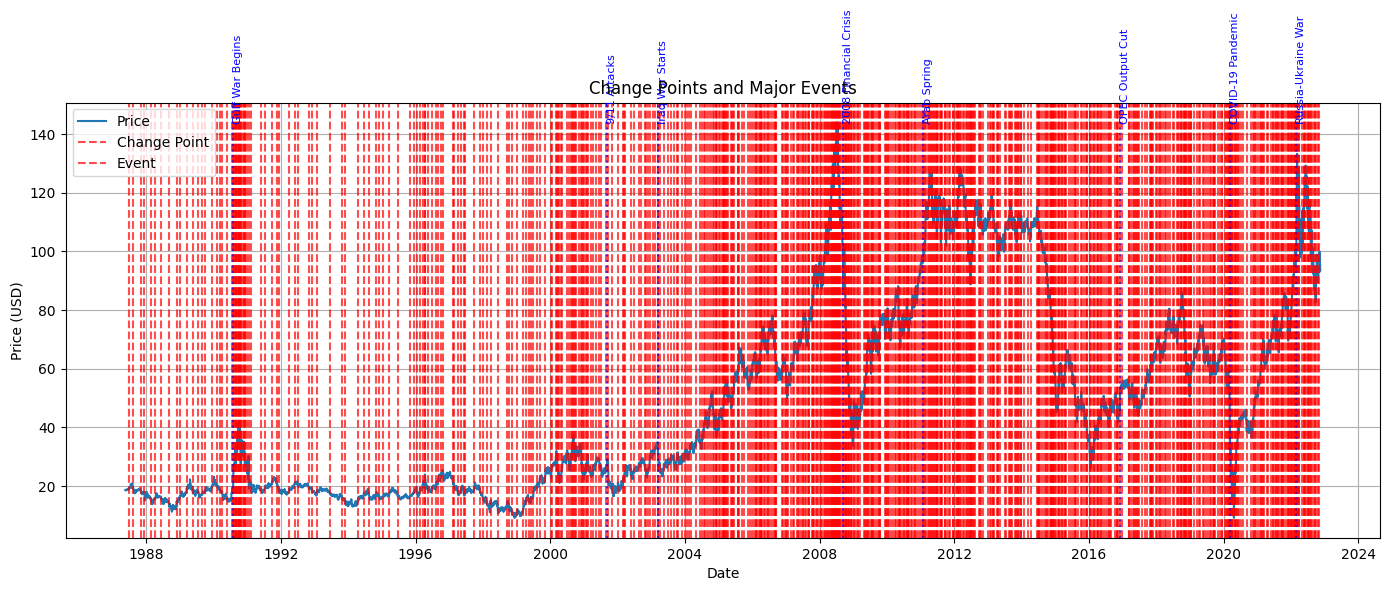

In [10]:
# 7. Optional: Overlay Events
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from event_data import load_event_data

event_df = load_event_data("../data/major_events.csv")

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
for i in breaks:
    if i < len(df):
        plt.axvline(df.iloc[i]['Date'], color='red', linestyle='--', alpha=0.7)

for _, row in event_df.iterrows():
    plt.axvline(row['Date'], color='blue', linestyle=':', alpha=0.6)
    plt.text(row['Date'], max(df['Price']), row['Event'], rotation=90, fontsize=8, color='blue')

plt.title("Change Points and Major Events")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(['Price', 'Change Point', 'Event'], loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()
